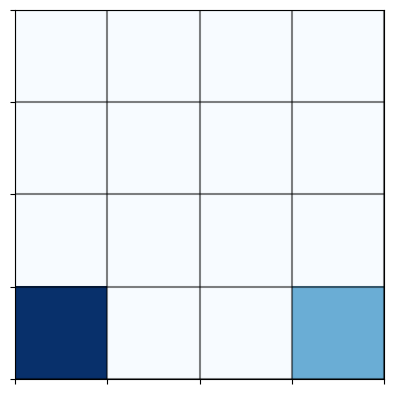

Action: Down, Reward: -6, Current State: (3, 0)


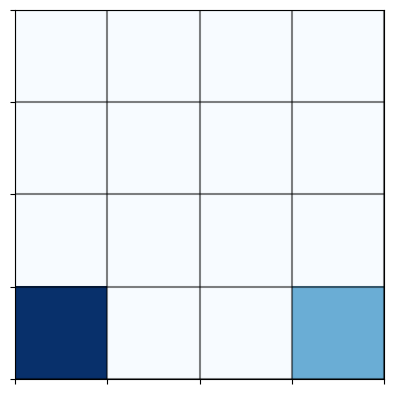

Action: Left, Reward: 6, Current State: (3, 0)


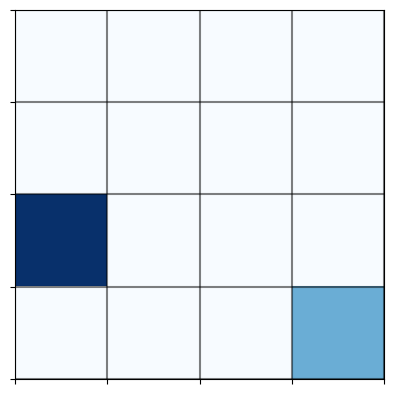

Action: Up, Reward: -5, Current State: (2, 0)


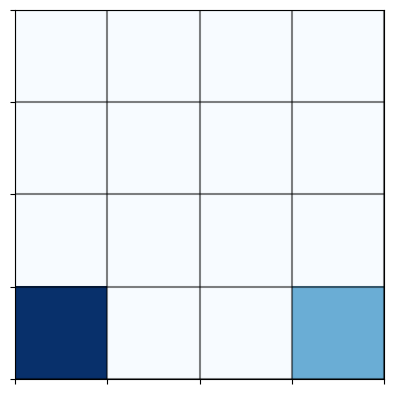

Action: Down, Reward: -6, Current State: (3, 0)


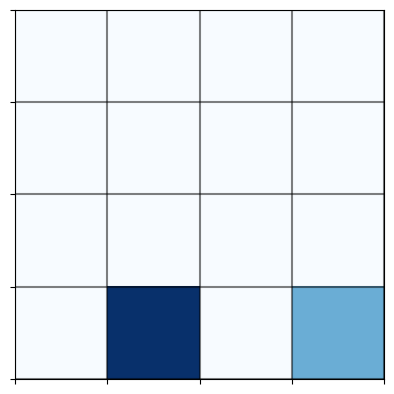

Action: Right, Reward: 5, Current State: (3, 1)


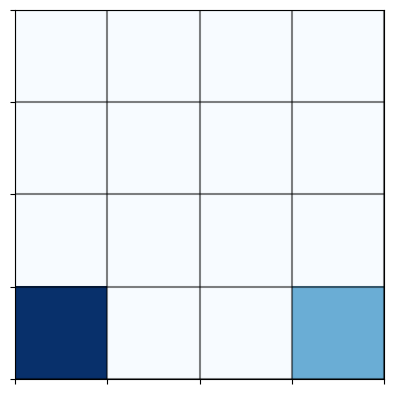

Action: Left, Reward: 6, Current State: (3, 0)


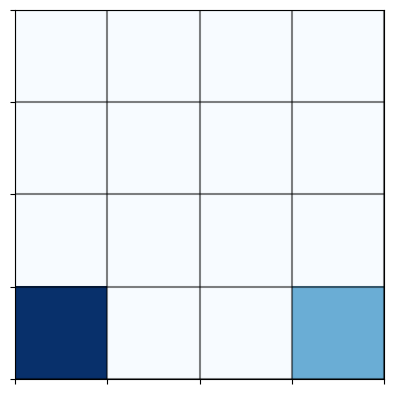

Action: Left, Reward: 6, Current State: (3, 0)


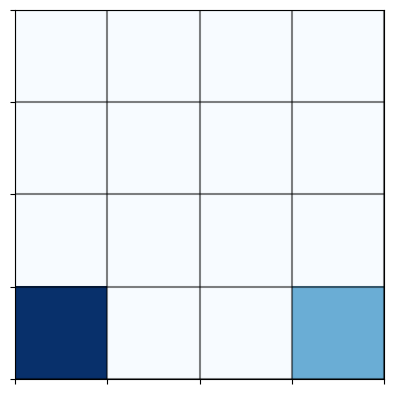

Action: Down, Reward: -6, Current State: (3, 0)


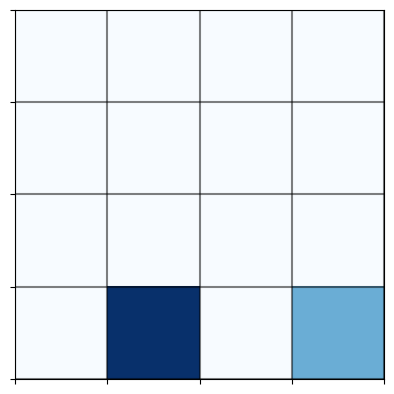

Action: Right, Reward: 5, Current State: (3, 1)


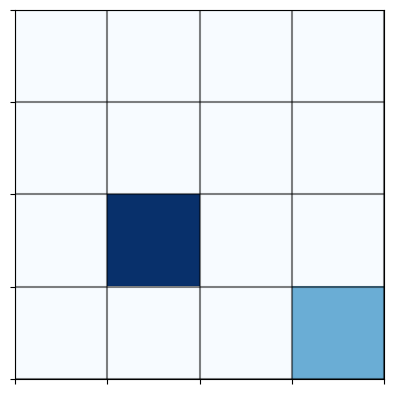

Action: Up, Reward: -5, Current State: (2, 1)


In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Lawnmower:
    def __init__(self):
        self.grid_size = (4, 4)
        self.states = [(i, j) for i in range(self.grid_size[0]) for j in range(self.grid_size[1])]
        self.actions = ["Up", "Down", "Right", "Left"]
        self.rewards = {"Up": -5, "Down": -6, "Right": +5, "Left": +6}
        self.goal_state = (3, 3)
        self.state = random.choice(self.states)

    def step(self, action):
        if action in self.actions:
            reward = self.rewards[action]

            if action == "Up" and self.state[0] > 0:
                self.state = (self.state[0] - 1, self.state[1])
                done = (self.state == self.goal_state)
            elif action == "Down" and self.state[0] < self.grid_size[0] - 1:
                self.state = (self.state[0] + 1, self.state[1])
                done = (self.state == self.goal_state)
            elif action == "Right" and self.state[1] < self.grid_size[1] - 1:
                self.state = (self.state[0], self.state[1] + 1)
                done = (self.state == self.goal_state)
            elif action == "Left" and self.state[1] > 0:
                self.state = (self.state[0], self.state[1] - 1)
            done = (self.state == self.goal_state)
            return self.state, reward, done
        else:
            raise ValueError("Invalid action. Choose from: " + ", ".join(self.actions))

    def reset(self):
        self.state = random.choice(self.states)
        return self.state

    def render(self):
        grid = np.zeros(self.grid_size)
        grid[self.state] = 1  
        grid[self.goal_state] = 0.5 

        plt.imshow(grid, cmap='Blues', interpolation='nearest')
        plt.grid(which='both', color='black', linewidth=1.5, linestyle='-', alpha=0.5, markersize=15)
        plt.xticks(np.arange(-0.5, self.grid_size[1], 1), [])
        plt.yticks(np.arange(-0.5, self.grid_size[0], 1), [])

        plt.show()

env = Lawnmower()

for _ in range(10):
    action = random.choice(env.actions)
    current_state, reward, done = env.step(action)
    env.render()
    print(f"Action: {action}, Reward: {reward}, Current State: {current_state}")


In [26]:
class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = np.zeros((len(env.states), len(env.actions)))
        self.epsilon_values = []  
        self.action_indices = {action: i for i, action in enumerate(env.actions)}

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return self.env.actions[np.argmax(self.q_table[self.env.states.index(state)])]

    def update_q_table(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[self.env.states.index(state), self.action_indices[action]]
        next_q = self.q_table[self.env.states.index(next_state), self.action_indices[next_action]]
        new_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
        self.q_table[self.env.states.index(state), self.action_indices[action]] = new_q

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.select_action(state)
            total_reward = 0

            while True:
                next_state, reward, done = self.env.step(action)
                next_action = self.select_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                total_reward += reward
                state = next_state
                action = next_action

                if state == self.env.goal_state:
                    break

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            self.epsilon_values.append(self.epsilon) 
            total_rewards.append(total_reward)

        return total_rewards, self.epsilon_values

env = Lawnmower()
sarsa_agent = SARSA(env)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[27.50248258 25.17017518 34.24420949 36.31714465]
 [27.15862653 25.42915901 34.77411076 38.82789534]
 [23.31765538 21.43175324 27.01274775 36.77975224]
 [ 9.56403196  7.82584933 10.61843325 32.20086861]
 [27.36964396 23.90818038 34.81835889 35.2393965 ]
 [27.69201081 25.1705393  33.11296354 37.76129715]
 [22.33377928 20.55095429 24.17245211 36.04092236]
 [ 4.03047656  7.55220468 13.09117587 34.69289037]
 [27.65771168 26.36448577 34.9991578  36.15591551]
 [27.98776057 26.75714492 33.32062175 36.14371376]
 [20.31500968 16.02631183 19.81920359 38.05459086]
 [13.47187353 -4.67709979 14.31002815 34.62492083]
 [26.8853044  29.2698956  38.56823106 41.8192306 ]
 [24.77913402 25.45642986 34.85422385 39.95433472]
 [20.17653

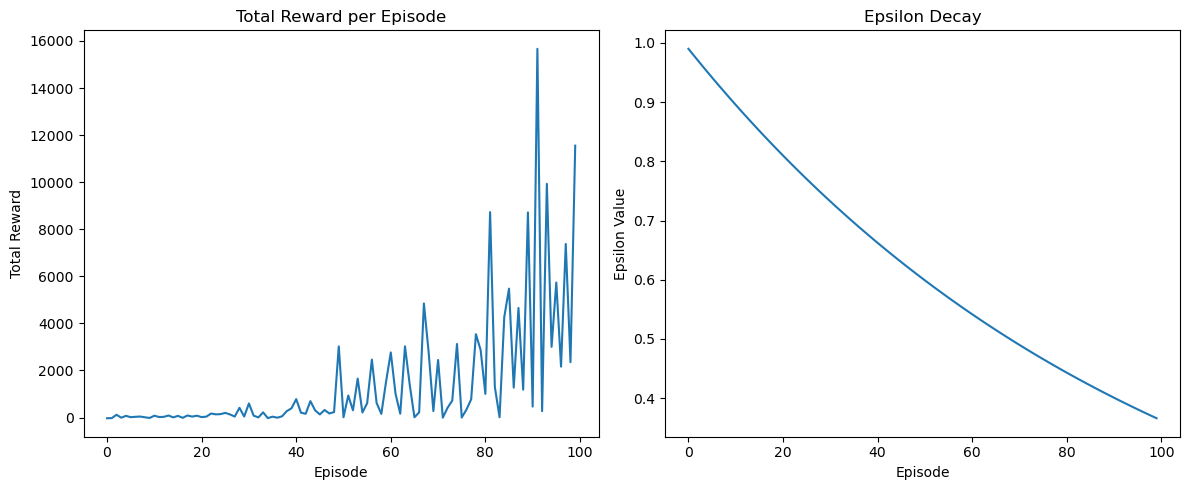

In [27]:

print("Initial Q-table:")
print(sarsa_agent.q_table)
total_rewards_train, epsilon_values_train = sarsa_agent.train(100)

print("\nTrained Q-table:")
print(sarsa_agent.q_table)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(total_rewards_train)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 2, 2)
plt.plot(epsilon_values_train)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')

plt.tight_layout()
plt.show()

In [38]:
greedy_rewards = []
for _ in range(10):
    state = env.reset()
    total_reward = 0
    while True:
        action = sarsa_agent.select_action(state)
        next_state, reward, done = env.step(action)
        total_reward += reward
        state = next_state
        if done:
            break
    greedy_rewards.append(total_reward)


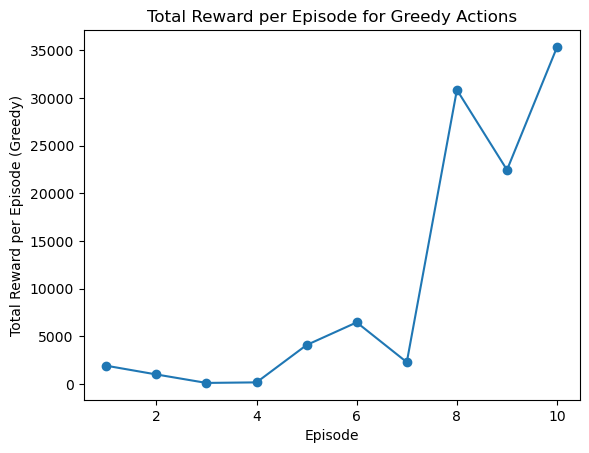

In [39]:
plt.plot(range(1, 11), greedy_rewards, marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode (Greedy)')
plt.title('Total Reward per Episode for Greedy Actions')
plt.show()

Initial Q-table for Gamma=0.9:
[[ 2.83845159e+01  2.53185968e+01  3.83093149e+01  3.68483063e+01]
 [ 2.63053897e+01  2.46135995e+01  3.36510242e+01  3.87301972e+01]
 [ 2.05388316e+01  2.11666442e+01  2.83016982e+01  3.73422416e+01]
 [ 9.32361775e+00  3.38855464e+00  2.20299975e+01  3.35582703e+01]
 [ 2.71924689e+01  2.40967458e+01  3.44101906e+01  3.77725250e+01]
 [ 2.47127373e+01  2.34757013e+01  3.39176753e+01  3.78996396e+01]
 [ 2.29167092e+01  1.94178114e+01  2.48631658e+01  3.64192974e+01]
 [ 3.66040708e+00 -2.46319257e-02  6.75160417e+00  3.15072652e+01]
 [ 2.33376787e+01  2.54251613e+01  3.47638927e+01  3.40796577e+01]
 [ 2.48924988e+01  2.37096819e+01  3.29928419e+01  3.60785816e+01]
 [ 2.13483386e+01  1.83805088e+01  1.95921614e+01  3.65003590e+01]
 [ 5.72164396e-01 -3.00711118e+00  9.78895421e+00  2.84960361e+01]
 [ 2.59980537e+01  2.57781575e+01  3.67826877e+01  3.62082389e+01]
 [ 2.53702483e+01  2.30982828e+01  3.32458571e+01  3.83478903e+01]
 [ 2.14368991e+01  1.73249822e+

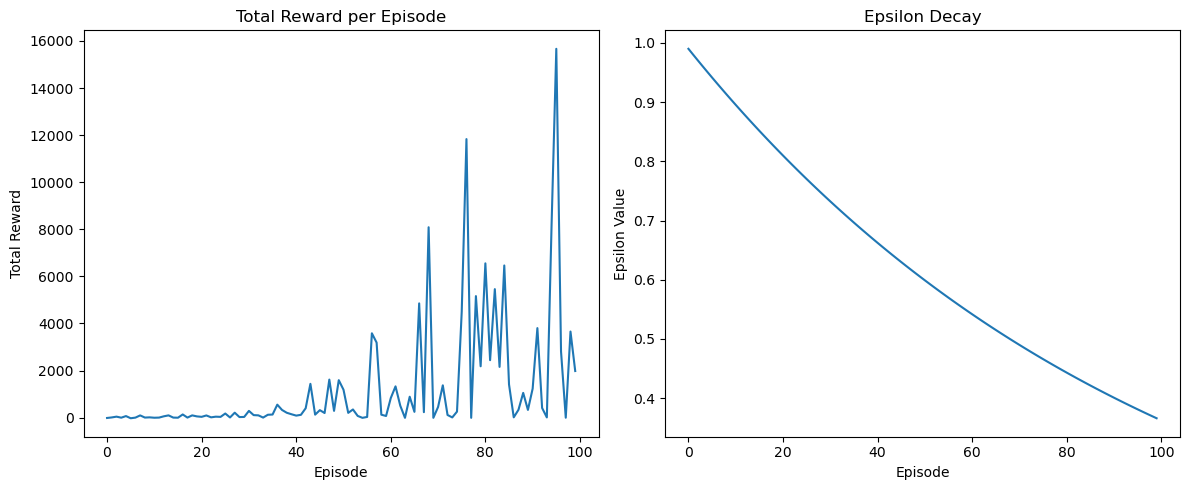

Initial Q-table for Gamma=0.95:
[[58.90473751 56.27165947 66.56198572 71.60578307]
 [56.71500975 56.44355119 63.67203624 67.01633742]
 [41.51628431 47.8761903  34.14475484 67.81260851]
 [19.93297558 17.83907396 20.39686006 55.23600813]
 [58.65840647 60.29379657 70.07424004 68.13109779]
 [57.49623508 57.45769791 60.42813743 68.85336265]
 [41.08499951 41.14168277 38.23868921 68.21597901]
 [19.21530062 21.34517583 27.39409372 56.74441542]
 [57.32576789 58.30655047 70.50955377 68.14420791]
 [58.03016086 58.02893465 60.49533994 71.7013017 ]
 [43.98140342 45.76232079 32.70970244 69.40374438]
 [16.29390565 -4.17628659 34.3425104  60.64731683]
 [59.42149977 60.59535085 67.90333857 70.67115945]
 [58.6643561  56.72494057 60.4241341  72.86499155]
 [42.71802217 48.20737723  6.55555678 71.91830338]
 [ 5.5881935  -0.6         0.          3.25605433]]


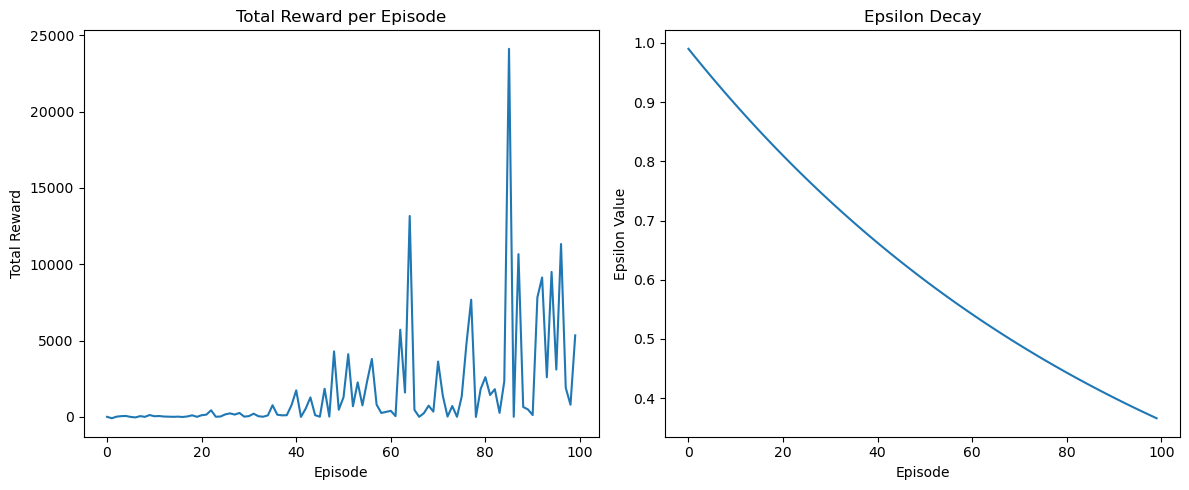

Initial Q-table for Gamma=0.8:
[[ 8.60986353  9.15270302 19.0172374  17.97839635]
 [ 8.35216512  8.16575332 17.98396618 19.02222494]
 [ 8.12263233  8.35340903 16.34979518 19.26999651]
 [ 2.03984001 -0.99074654  8.58878812 18.71915271]
 [ 9.50649179  9.04716036 19.33639649 21.91150562]
 [ 9.26085875  7.93201953 17.32953125 21.05466052]
 [ 7.50309809  4.63328977 12.0858645  20.04639779]
 [-0.43670189  0.25531773  8.16031953 16.75888566]
 [ 9.81587231  9.36715675 19.32223313 18.77845106]
 [ 8.98018287  8.12749962 20.55980036 20.01410762]
 [ 5.85406748  4.54941406 14.75500289 20.34260755]
 [ 0.82506715 -4.67220072  9.19447261 19.40364219]
 [10.56705022  8.15833079 19.15578592 20.41552561]
 [ 8.71749852  9.05231756 18.04765262 21.36579685]
 [ 8.84648793  2.90919654  6.08466585 21.53187124]
 [-0.04282046 -0.6         1.8279      0.        ]]


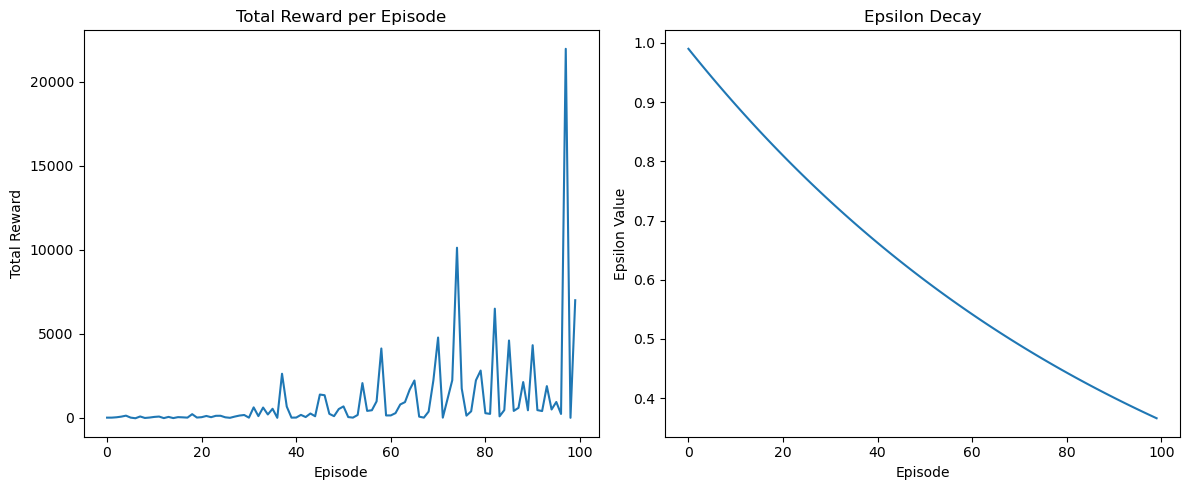

The best gamma value is: 0.95


In [5]:
env = Lawnmower()
gamma_values = [0.9, 0.95, 0.8]
results_gamma = []
best_gamma = None
max_total_reward = float('-inf')

for gamma_val in gamma_values:
    env = Lawnmower()
    sarsa_agent_gamma = SARSA(env, gamma=gamma_val)

    total_rewards_gamma, epsilon_values_gamma = sarsa_agent_gamma.train(100)
    results_gamma.append(total_rewards_gamma)

    if max(total_rewards_gamma) > max_total_reward:
        max_total_reward = max(total_rewards_gamma)
        best_gamma = gamma_val

    print(f"Initial Q-table for Gamma={gamma_val}:")
    print(sarsa_agent_gamma.q_table)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(total_rewards_gamma)
    plt.title('Total Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    plt.subplot(1, 2, 2)
    plt.plot(epsilon_values_gamma)
    plt.title('Epsilon Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')

    plt.tight_layout()
    plt.show()

print(f"The best gamma value is: {best_gamma}")


Initial Q-table for Epsilon Decay=0.3:
[[47.60815933 46.53583139 57.13592174 58.77530404]
 [47.33584206 46.68118751 55.15505745 58.1229259 ]
 [44.45496897 46.51727161 53.48105812 56.92254922]
 [44.23178181 45.78805491 53.72291199 55.74503908]
 [47.13911955 46.49639491 57.50297608 58.5024666 ]
 [47.66859935 46.45269666 54.27598007 58.24077608]
 [ 6.83737096  1.50338828  6.64755333 58.24000257]
 [-1.54838318 -1.14        6.22749704 58.23029697]
 [47.4617004  46.49988412 57.76997914 57.64829571]
 [47.41204803 46.52470428 52.66228427 58.56302845]
 [-0.545      -1.185       3.14975742 57.27174393]
 [-0.554      -0.6         0.5        27.72216239]
 [47.46760181 46.52953633 53.18901165 57.23615299]
 [47.47784838 46.12715776 10.87168863 58.00245318]
 [-0.90086    -1.14        6.82789616  0.        ]
 [-0.24148493 -0.6         2.45049751  0.        ]]


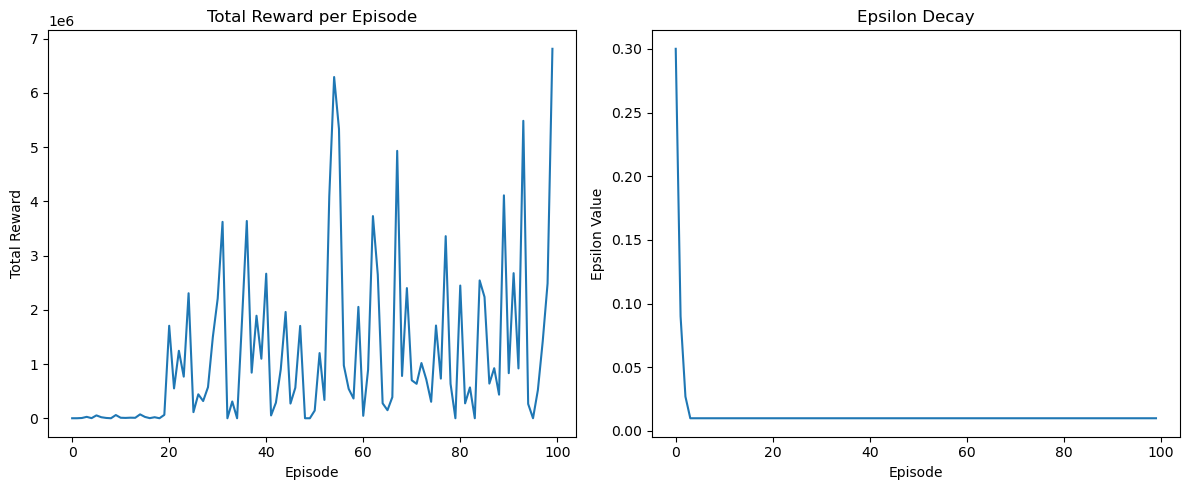

Initial Q-table for Epsilon Decay=0.6:
[[47.17436906 46.47208748 55.94005164 58.50111162]
 [-0.66697884  2.60745571  0.554      57.57551039]
 [-0.5         0.53975737  0.         58.03004935]
 [37.94809754 35.64475717 47.83056202 58.2395582 ]
 [46.97629223 45.67375302 49.58452802 58.72326362]
 [-0.76019245 -0.6        50.28179973  0.        ]
 [12.21070352 13.0341158  49.7825042  16.04338674]
 [46.05143081 41.34605789 49.08850056 48.67531612]
 [46.04406758 42.82846484 46.34467642 58.72480593]
 [ 3.58900796 -0.6        51.49204173 19.81165265]
 [38.33484996 13.10094846 53.21570118 48.52651663]
 [38.03630841 12.6763779  48.4055169  50.08881711]
 [40.3310651  29.81080342 15.90701386 56.3606185 ]
 [-0.905      -1.1245245  21.63075507  0.        ]
 [-0.5        -1.095      26.5402539   0.        ]
 [25.36111287  0.          0.          0.        ]]


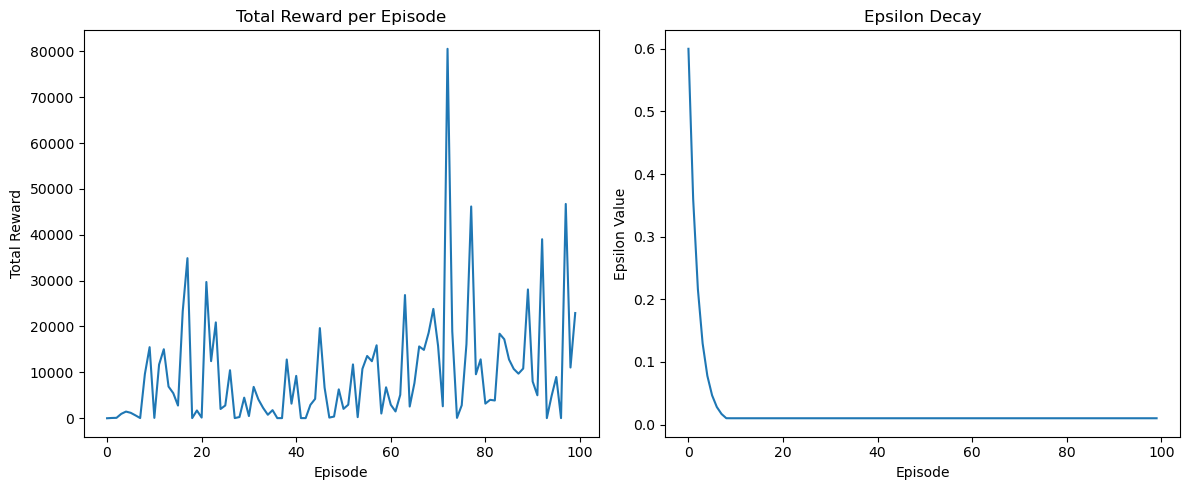

Initial Q-table for Epsilon Decay=0.9:
[[47.36235496 46.42388664 56.62391724 57.95752281]
 [47.31147656 46.20576337 56.45498979 57.7258933 ]
 [46.18183961 45.57083554 51.93755175 57.90741935]
 [ 7.66027817  8.62759982 19.51425487 56.19827458]
 [47.2875223  46.57170466 57.70518721 57.85558327]
 [47.44719948 46.55373716 56.21812325 58.90577444]
 [46.32559183 45.59978126 55.41182011 57.53952298]
 [47.23842789 46.33816783 54.30592762 56.99780752]
 [47.58692378 45.92031634 57.57354576 58.71736016]
 [47.62575873 46.52249004 56.06245358 58.88945194]
 [46.53242782 45.65160543 54.57215165 57.21022011]
 [38.18482067 -5.07533535 45.48963257 56.66410912]
 [46.96844717 46.08015149 56.62142928 56.4958247 ]
 [46.56080607 46.24264937 52.61516033 56.28808844]
 [46.37176205 45.14956721 13.79211653 57.10112218]
 [12.25746859  0.          0.          0.        ]]


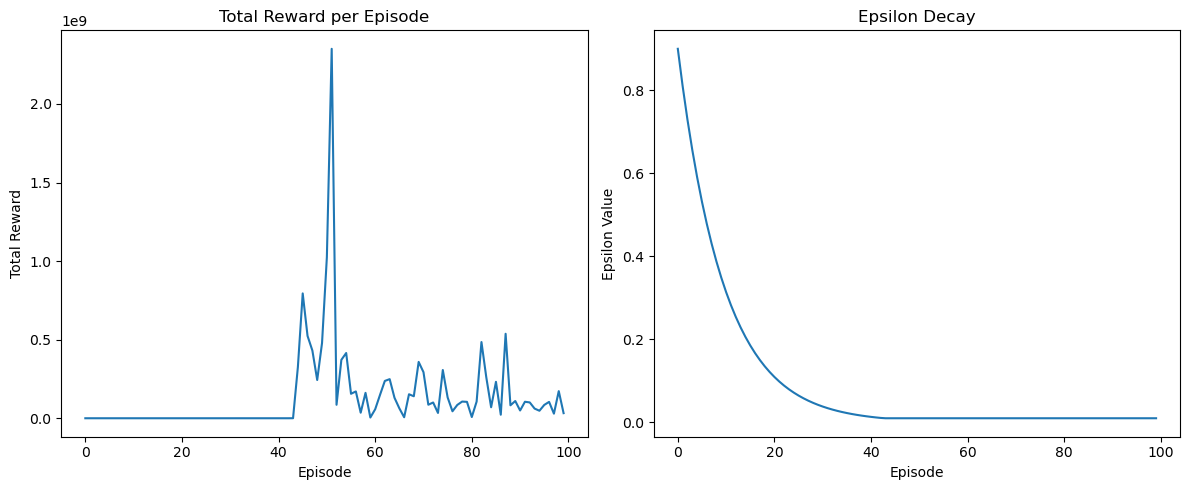

The best epsilon decay value is: 0.9


In [13]:
epsilon_decay_values = [0.3, 0.6, 0.9]
results_epsilon_decay = []
best_epsilon_decay = None
max_total_reward_epsilon = float('-inf')

for epsilon_decay_val in epsilon_decay_values:
    sarsa_agent_epsilon_decay = SARSA(env, epsilon_decay=epsilon_decay_val)
    total_rewards_epsilon_decay, _ = sarsa_agent_epsilon_decay.train(100)
    results_epsilon_decay.append(total_rewards_epsilon_decay)

    
    if max(total_rewards_epsilon_decay) > max_total_reward_epsilon:
        max_total_reward_epsilon = max(total_rewards_epsilon_decay)
        best_epsilon_decay = epsilon_decay_val

   
    print(f"Initial Q-table for Epsilon Decay={epsilon_decay_val}:")
    print(sarsa_agent_epsilon_decay.q_table)

    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(total_rewards_epsilon_decay)
    plt.title('Total Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    plt.subplot(1, 2, 2)
    plt.plot(sarsa_agent_epsilon_decay.epsilon_values)
    plt.title('Epsilon Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')

    plt.tight_layout()
    plt.show()

print(f"The best epsilon decay value is: {best_epsilon_decay}")


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

class DoubleQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.Q_A = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
        self.Q_B = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
        self.state = random.choice(self.env.states)
        self.epsilon_values = []

    def choose_action(self, state, q_table):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)  
        else:
            return self.env.actions[np.argmax(q_table[state])]

    def step(self, action):
        if action not in self.env.actions:
            raise ValueError("Invalid action. Choose from: " + ", ".join(self.env.actions))

        reward = 0  
        next_state = self.state  

        if action == "Up" and self.state[0] > 0:
            next_state = (self.state[0] - 1, self.state[1])
            reward = self.env.rewards[action]
        elif action == "Down" and self.state[0] < self.env.grid_size[0] - 1:
            next_state = (self.state[0] + 1, self.state[1])
            reward = self.env.rewards[action]
        elif action == "Right" and self.state[1] < self.env.grid_size[1] - 1:
            next_state = (self.state[0], self.state[1] + 1)
            reward = self.env.rewards[action]
        elif action == "Left" and self.state[1] > 0:
            next_state = (self.state[0], self.state[1] - 1)
            reward = self.env.rewards[action]

        if random.uniform(0, 1) < 0.5:
            max_next_action = np.argmax(self.Q_A[next_state])
            self.Q_A[self.state][self.env.actions.index(action)] += self.alpha * (
                    reward + self.gamma * self.Q_B[next_state][max_next_action] -
                    self.Q_A[self.state][self.env.actions.index(action)])
        else:
            max_next_action = np.argmax(self.Q_B[next_state])
            self.Q_B[self.state][self.env.actions.index(action)] += self.alpha * (
                    reward + self.gamma * self.Q_A[next_state][max_next_action] -
                    self.Q_B[self.state][self.env.actions.index(action)])

        self.state = next_state

        done = (self.state == self.env.goal_state)
        return next_state, reward, done

    def reset(self):
        self.state = random.choice(self.env.states)
        return self.state

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state, self.Q_A + self.Q_B)
            total_reward = 0

            while True:
                next_state, reward, done = self.step(action)
                next_action = self.choose_action(next_state, self.Q_A + self.Q_B)   
                total_reward += reward
                state = next_state
                action = next_action

                if done:
                    break

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            self.epsilon_values.append(self.epsilon)
            total_rewards.append(total_reward)

        return total_rewards, self.epsilon_values
    def run_greedy_episodes(self, num_episodes=10):
        total_rewards_per_episode = []

        for episode in range(num_episodes):
            total_reward = 0

            while True:
                action = self.choose_action(self.state, self.Q_A + self.Q_B)
                current_state, reward, done = self.step(action)
                total_reward += reward

                if done:
                    break

            total_rewards_per_episode.append(total_reward)

            self.reset()

        return total_rewards_per_episode




In [9]:
env = Lawnmower()
agent = DoubleQLearning(env)
print("Initial Q-tables:")
print("Q_A:\n", agent.Q_A)
print("Q_B:\n", agent.Q_B)

num_training_episodes = 100
total_rewards, epsilon_values = agent.train(num_training_episodes)


print("\nTrained Q-tables:")
print("Q_A:\n", agent.Q_A)
print("Q_B:\n", agent.Q_B)



Initial Q-tables:
Q_A:
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Q_B:
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]

Trained Q-tables:
Q_A:
 [[[49.21467891 43.09327454 54.71323353 49.19326008]
  [49.68089496 43.60369474 55.03429525 55.24365941]
  [43.3764558  33.16961258 30.2381281  55.66146447]
  [ 8.1550388   6.63191959  5.64985093 48.99989022]]

 [[44.15283199 43.02932918 54.69024704 49.11670683]
  [44.66260193 43.47796057 54.69709037 55.20010305]
  [31.28571706 27.87090502 24.24358673 55.58276066]
  [ 9.79357343  0.35439221  3.93503533 45.07567967]

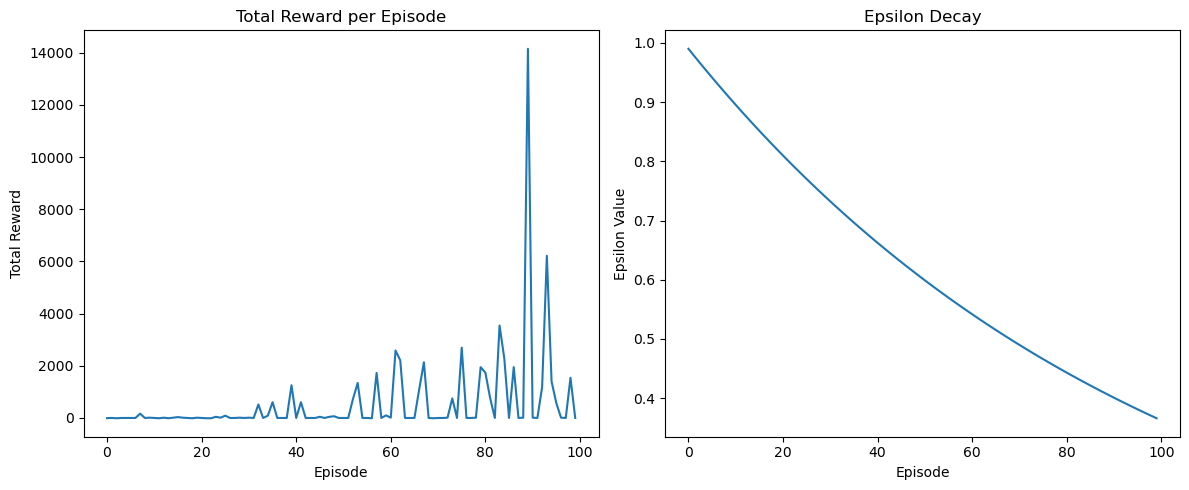

In [10]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(total_rewards)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 2, 2)
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')

plt.tight_layout()
plt.show()



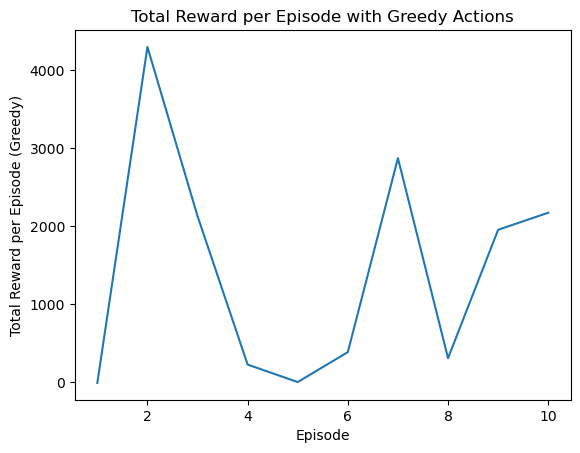

In [11]:

num_greedy_episodes = 10
total_rewards_greedy = agent.run_greedy_episodes(num_episodes=num_greedy_episodes)

plt.plot(range(1, num_greedy_episodes + 1), total_rewards_greedy)
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (Greedy)")
plt.title("Total Reward per Episode with Greedy Actions")
plt.show()

In [11]:
def gamma(gamma_values, num_episodes=100):
    results_gamma = {}

    for gamma in gamma_values:
        agent = DoubleQLearning(env, gamma=gamma)
        total_rewards, epsilon_values = agent.train(num_episodes)
        results_gamma[gamma] = {'total_rewards': total_rewards, 'epsilon_values': epsilon_values}

    return results_gamma

def epsilon_decay(epsilon_decay_values, num_episodes=100):
    results_epsilon_decay = {}

    for epsilon_decay in epsilon_decay_values:
        agent = DoubleQLearning(env, epsilon_decay=epsilon_decay)
        total_rewards, epsilon_values = agent.train(num_episodes)
        results_epsilon_decay[epsilon_decay] = {'total_rewards': total_rewards, 'epsilon_values': epsilon_values}

    return results_epsilon_decay


env = Lawnmower()

gamma_values = [0.9, 0.95, 0.99]
epsilon_decay_values = [0.98, 0.995, 0.999]

results_gamma = gamma(gamma_values)

best_gamma = max(results_gamma, key=lambda gamma: max(results_gamma[gamma]['total_rewards']))
best_total_rewards_gamma = max(results_gamma[best_gamma]['total_rewards'])
print(f"Best Gamma: {best_gamma}, Highest Total Rewards: {best_total_rewards_gamma}")

results_epsilon_decay = epsilon_decay(epsilon_decay_values)

best_epsilon_decay = max(results_epsilon_decay, key=lambda epsilon_decay: max(results_epsilon_decay[epsilon_decay]['total_rewards']))
best_total_rewards_epsilon_decay = max(results_epsilon_decay[best_epsilon_decay]['total_rewards'])
print(f"Best Epsilon Decay Rate: {best_epsilon_decay}, Highest Total Rewards: {best_total_rewards_epsilon_decay}")




Best Gamma: 0.95, Highest Total Rewards: 1760
Best Epsilon Decay Rate: 0.98, Highest Total Rewards: 5885


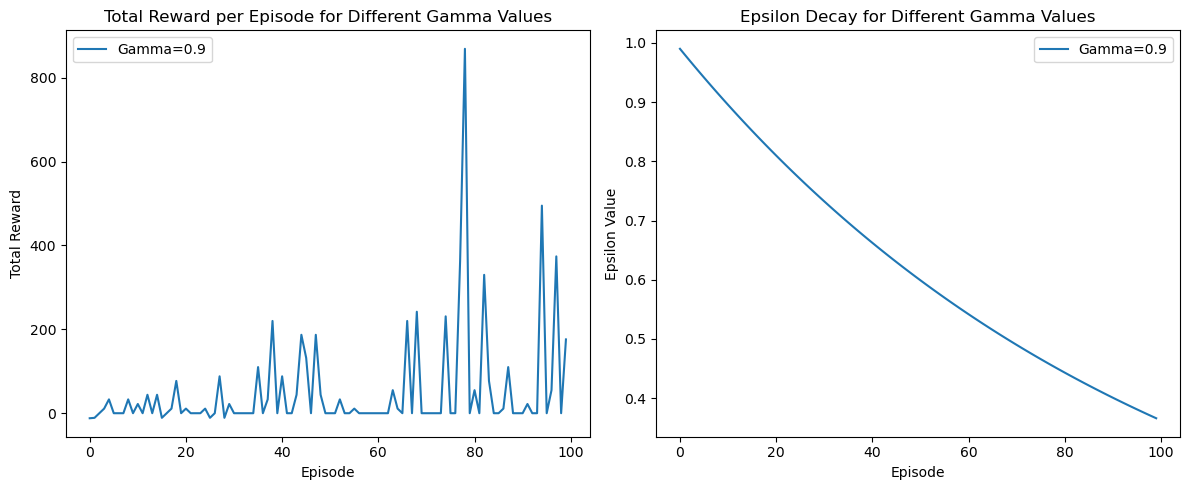

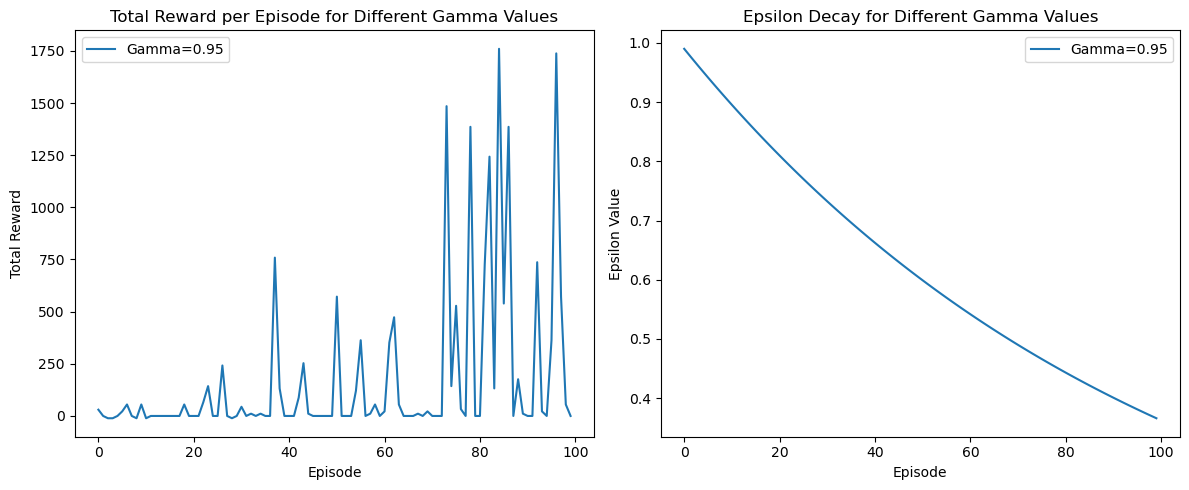

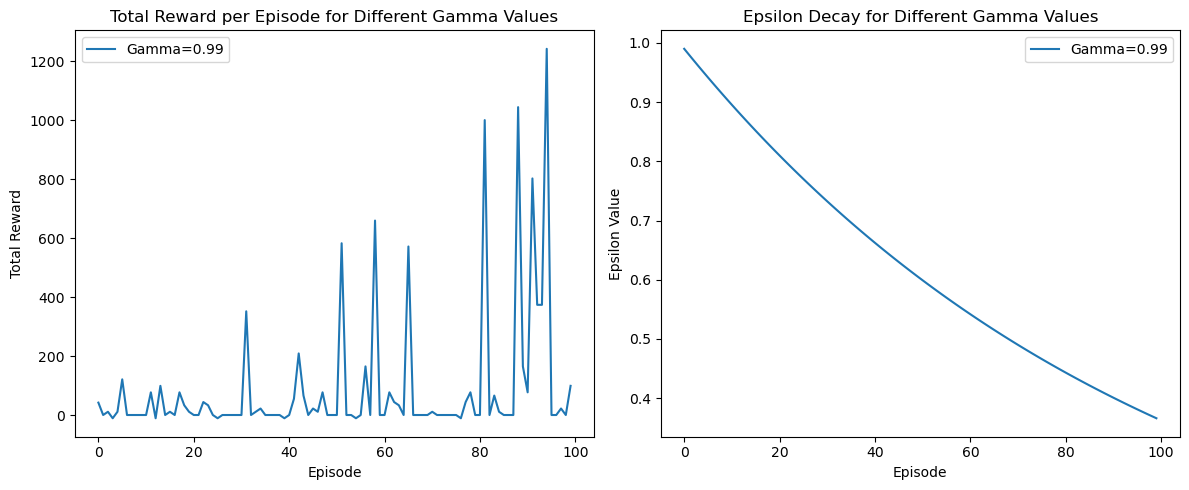

In [12]:

for gamma, result in results_gamma.items():
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(result['total_rewards'], label=f'Gamma={gamma}')
    plt.title('Total Reward per Episode for Different Gamma Values')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(result['epsilon_values'], label=f'Gamma={gamma}')
    plt.title('Epsilon Decay for Different Gamma Values')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.legend()

    plt.tight_layout()
    plt.show()




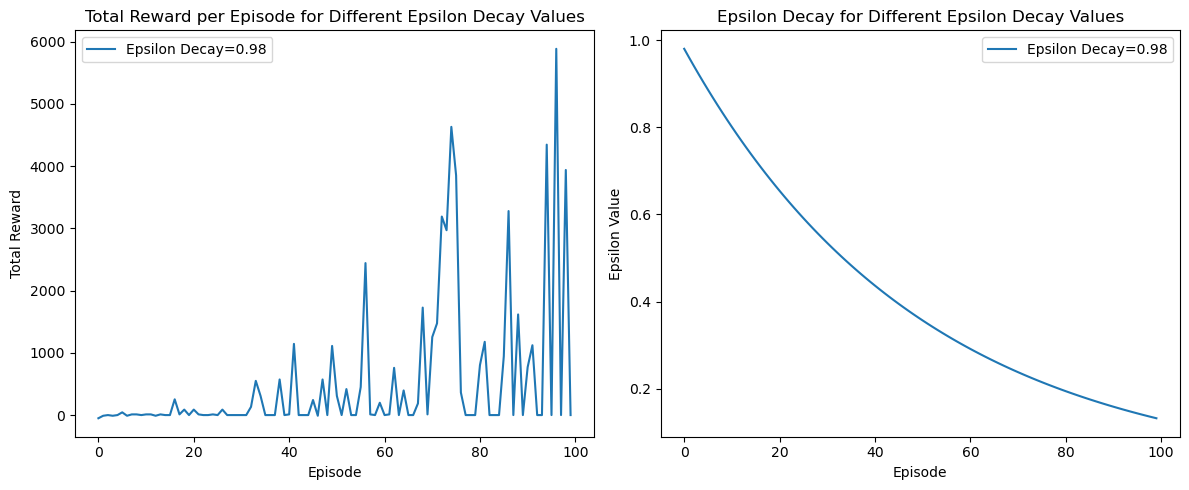

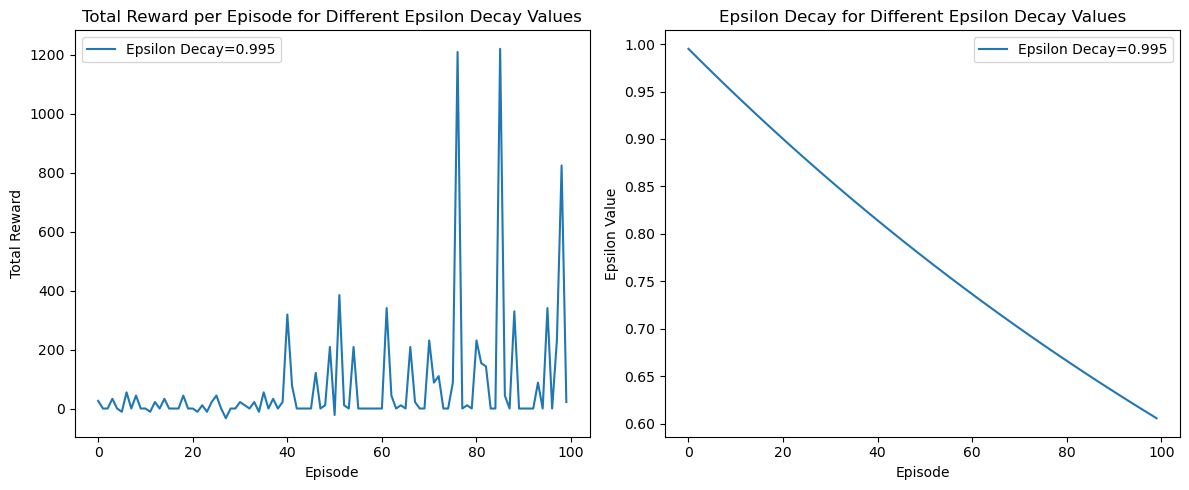

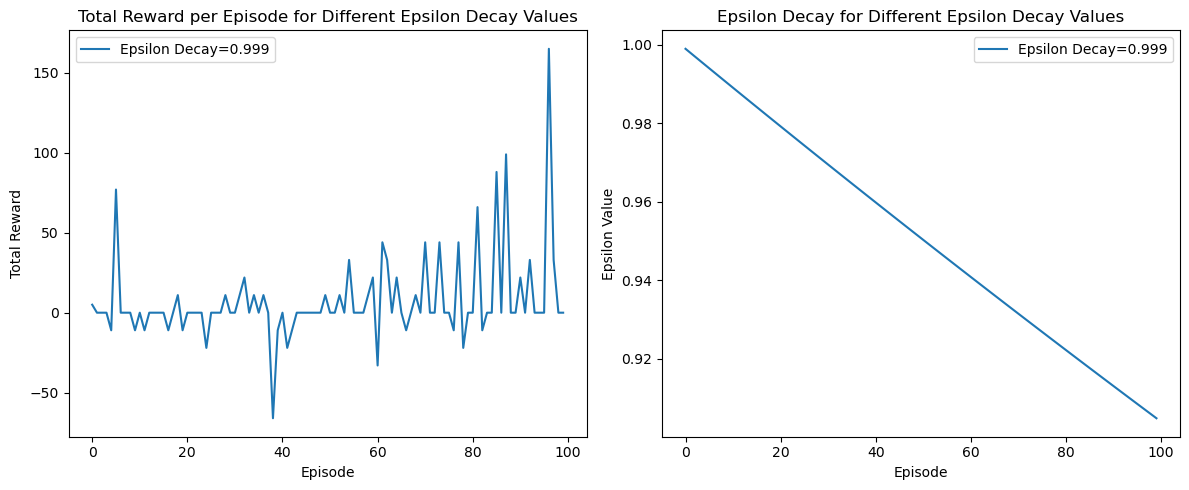

In [13]:

for epsilon_decay, result in results_epsilon_decay.items():
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(result['total_rewards'], label=f'Epsilon Decay={epsilon_decay}')
    plt.title('Total Reward per Episode for Different Epsilon Decay Values')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(result['epsilon_values'], label=f'Epsilon Decay={epsilon_decay}')
    plt.title('Epsilon Decay for Different Epsilon Decay Values')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [53]:
class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = np.zeros((len(env.states), len(env.actions)))
        self.epsilon_values = []  
        self.action_indices = {action: i for i, action in enumerate(env.actions)}

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return self.env.actions[np.argmax(self.q_table[self.env.states.index(state)])]

    def update_q_table(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[self.env.states.index(state), self.action_indices[action]]
        next_q = self.q_table[self.env.states.index(next_state), self.action_indices[next_action]]
        new_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
        self.q_table[self.env.states.index(state), self.action_indices[action]] = new_q

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.select_action(state)
            total_reward = 0

            while True:
                next_state, reward, done = self.env.step(action)
                next_action = self.select_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                total_reward += reward
                state = next_state
                action = next_action

                if state == self.env.goal_state:
                    break

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            self.epsilon_values.append(self.epsilon) 
            total_rewards.append(total_reward)

        return total_rewards, self.epsilon_values


In [54]:
import random
import numpy as np
import matplotlib.pyplot as plt

class DoubleQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.Q_A = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
        self.Q_B = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
        self.state = random.choice(self.env.states)
        self.epsilon_values = []

    def choose_action(self, state, q_table):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)  
        else:
            return self.env.actions[np.argmax(q_table[state])]

    def step(self, action):
        if action not in self.env.actions:
            raise ValueError("Invalid action. Choose from: " + ", ".join(self.env.actions))

        reward = 0  
        next_state = self.state  

        if action == "Up" and self.state[0] > 0:
            next_state = (self.state[0] - 1, self.state[1])
            reward = self.env.rewards[action]
        elif action == "Down" and self.state[0] < self.env.grid_size[0] - 1:
            next_state = (self.state[0] + 1, self.state[1])
            reward = self.env.rewards[action]
        elif action == "Right" and self.state[1] < self.env.grid_size[1] - 1:
            next_state = (self.state[0], self.state[1] + 1)
            reward = self.env.rewards[action]
        elif action == "Left" and self.state[1] > 0:
            next_state = (self.state[0], self.state[1] - 1)
            reward = self.env.rewards[action]

        if random.uniform(0, 1) < 0.5:
            max_next_action = np.argmax(self.Q_A[next_state])
            self.Q_A[self.state][self.env.actions.index(action)] += self.alpha * (
                    reward + self.gamma * self.Q_B[next_state][max_next_action] -
                    self.Q_A[self.state][self.env.actions.index(action)])
        else:
            max_next_action = np.argmax(self.Q_B[next_state])
            self.Q_B[self.state][self.env.actions.index(action)] += self.alpha * (
                    reward + self.gamma * self.Q_A[next_state][max_next_action] -
                    self.Q_B[self.state][self.env.actions.index(action)])

        self.state = next_state

        done = (self.state == self.env.goal_state)
        return next_state, reward, done

    def reset(self):
        self.state = random.choice(self.env.states)
        return self.state

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state, self.Q_A + self.Q_B)
            total_reward = 0

            while True:
                next_state, reward, done = self.step(action)
                next_action = self.choose_action(next_state, self.Q_A + self.Q_B)   
                total_reward += reward
                state = next_state
                action = next_action

                if done:
                    break

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            self.epsilon_values.append(self.epsilon)
            total_rewards.append(total_reward)

        return total_rewards, self.epsilon_values
    def run_greedy_episodes(self, num_episodes=10):
        total_rewards_per_episode = []

        for episode in range(num_episodes):
            total_reward = 0

            while True:
                action = self.choose_action(self.state, self.Q_A + self.Q_B)
                current_state, reward, done = self.step(action)
                total_reward += reward

                if done:
                    break

            total_rewards_per_episode.append(total_reward)

            self.reset()

        return total_rewards_per_episode




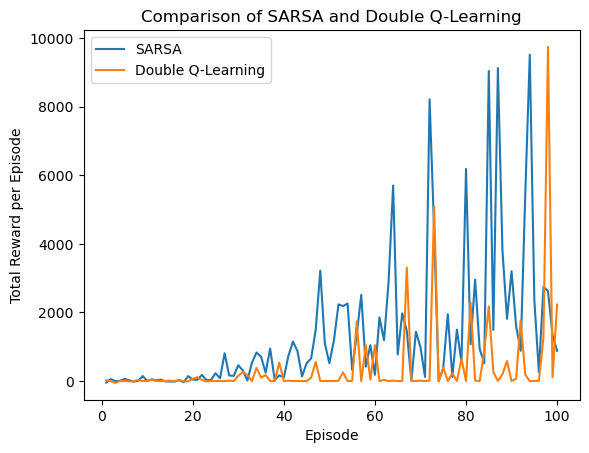

In [64]:

env = Lawnmower()
sarsa_agent = SARSA(env)
dq_agent = DoubleQLearning(env)

num_training_episodes = 100
total_rewards_sarsa, _ = sarsa_agent.train(num_episodes=num_training_episodes)
total_rewards_dq_agent, _ = dq_agent.train(num_episodes=num_training_episodes)

plt.plot(range(1, num_training_episodes + 1), total_rewards_sarsa, label='SARSA')
plt.plot(range(1, num_training_episodes + 1), total_rewards_dq_agent, label='Double Q-Learning')
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode")
plt.title("Comparison of SARSA and Double Q-Learning")
plt.legend()
plt.show()
